In [94]:
import numpy as np
import scipy.linalg as lng
import matplotlib.pyplot as plt

# 1. Least Squares Problem

In [95]:
data = np.genfromtxt("datafile.csv")
x_vec = data[:,0]
A = np.zeros((x_vec.shape[0], 6))
for m in range(6):
    A[:,m] = x_vec**m
b = data[:,1]

In [96]:
data = np.genfromtxt("datafile2.csv", delimiter=",")
A = data[:,:11]
b = data[:,11]

In [97]:
def solve_LSP_QR(A, b):
    n = A.shape[1]
    Q, R, P = lng.qr(A, pivoting=True)
    rank = np.linalg.matrix_rank(A)

    R1 = R[:rank, :rank]

    C_D = Q.T @ b
    C = C_D[:rank]

    u = lng.solve_triangular(R1, C)
    v = np.zeros(n-rank) # set v to zero

    P = np.eye(n)[:,P] # permutation matrix
    x = np.linalg.solve(P.T, np.concatenate((u, v)))

    return x


x =solve_LSP_QR(A, b)
print(np.linalg.norm(A@x-b))


1.1495978959689628


In [98]:
def solve_LSP(A, b):
    u, s, v = np.linalg.svd(A)
    for i in range(s.shape[0]):
        if s[i] < 1e-10:
            s[i] = 0
        else:
            s[i] = 1/s[i]
    s_plus = np.concatenate((np.diag(s), np.zeros((s.shape[0], u.shape[0]-s.shape[0]))), axis=1)
    Ainv = np.dot(v.T, np.dot(s_plus, u.T))
    return Ainv@b


x =solve_LSP(A, b)
print(np.linalg.norm(A@x-b))

1.1495978959252495


In [100]:
from scipy.linalg import lstsq
print(x)
print(np.linalg.norm(A@lstsq(A,b)[0]-b))

[ 8.30257127e+00  8.30355627e+00 -1.88268350e+03  2.99498591e+04
 -2.12104358e+05  8.37034712e+05 -2.00324191e+06  2.97903439e+06
 -2.69206452e+06  1.35366101e+06 -2.90442987e+05]
1.1495978959396702


# 2. Graphics compression

In [85]:
from datetime import datetime
from matplotlib.image import imsave

def image_compression(img_path, start=1, stop=41, step=5):
    # datetime object containing current date and time
    now = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    image = imread(img_path)
    im_new = np.zeros(image.shape)
    for c in range(start, stop, step):   
        tmp = []
        for i in range(3):
            U, s, V = np.linalg.svd(image[:,:,i].astype(float)/256)
            im_new[:,:,i] = np.matrix(U[:,:c])*np.diag(s[:c])*np.matrix(V[:c,:])
            frob = np.linalg.norm(im_new[:,:,i],'fro')/np.linalg.norm(image[:,:,i].astype(float)/256,'fro')*100
            tmp.append(frob)
        imsave("image_"+now+f"{frob:.02f}".replace(".","-" )+".jpeg", np.clip(im_new,0,1))


C:\Users\manue\AppData\Local\Temp\ipykernel_2872\1143626660.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread("jf_2.jpg")


81.83% of Froebius captured
78.97% of Froebius captured
79.12% of Froebius captured
0.754436468489606 0.0008048879323490016
95.77% of Froebius captured
94.35% of Froebius captured
93.83% of Froebius captured
1.058289210765848 -0.2165655545371009
97.64% of Froebius captured
96.88% of Froebius captured
96.42% of Froebius captured
1.0728354820235768 -0.2386262590771162
98.40% of Froebius captured
97.89% of Froebius captured
97.59% of Froebius captured
1.077668159010705 -0.15274220225908602
98.82% of Froebius captured
98.43% of Froebius captured
98.22% of Froebius captured
1.0384802554266939 -0.18304745336716308
99.09% of Froebius captured
98.80% of Froebius captured
98.62% of Froebius captured
1.0278969673160208 -0.15049216578632524
99.28% of Froebius captured
99.03% of Froebius captured
98.89% of Froebius captured
1.0449036330458417 -0.1360875828151231
99.42% of Froebius captured
99.22% of Froebius captured
99.09% of Froebius captured
1.0260669138116394 -0.13562428541694238


In [73]:
from imageio import imread, imsave

image = imread("jf_2.jpg")

C:\Users\manue\AppData\Local\Temp\ipykernel_2872\3587131777.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread("jf_2.jpg")


(800, 1200)


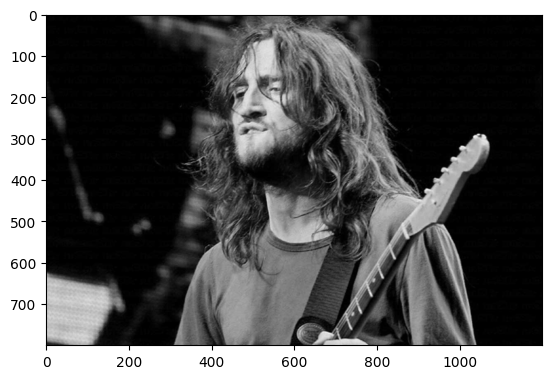

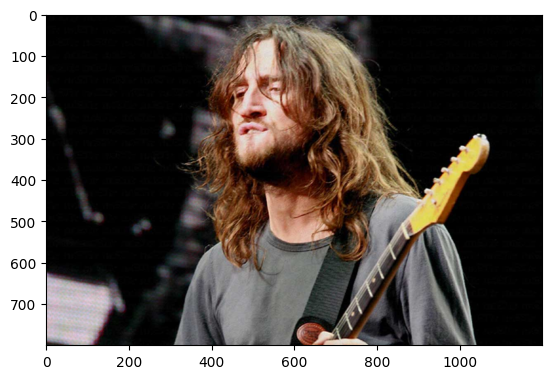

In [74]:

print(np.average(image,axis=2).shape)

plt.imshow(np.average(image,axis=2), cmap="gray")
plt.show()
plt.imshow(image.astype(float)/256)
plt.show()

81.83% of Froebius captured
78.97% of Froebius captured
79.12% of Froebius captured
95.77% of Froebius captured
94.35% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


93.83% of Froebius captured
97.64% of Froebius captured
96.88% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


96.42% of Froebius captured
98.40% of Froebius captured
97.89% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


97.59% of Froebius captured
98.82% of Froebius captured
98.43% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


98.22% of Froebius captured
99.09% of Froebius captured
98.80% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


98.62% of Froebius captured
99.28% of Froebius captured
99.03% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


98.89% of Froebius captured
99.42% of Froebius captured
99.22% of Froebius captured


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


99.09% of Froebius captured


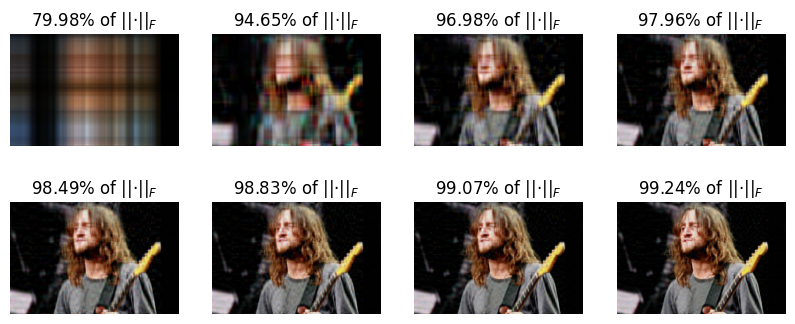

In [75]:
im_new = np.zeros(image.shape)
fig, axes = plt.subplots(2, 4, figsize=(10, 4))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()
k = 0
for c in range(1, 41, 5):   
    tmp = []
    for i in range(3):
        U, s, V = np.linalg.svd(image[:,:,i].astype(float)/256)
        im_new[:,:,i] = np.matrix(U[:,:c])*np.diag(s[:c])*np.matrix(V[:c,:])
        frob = np.linalg.norm(im_new[:,:,i],'fro')/np.linalg.norm(image[:,:,i].astype(float)/256,'fro')*100
        print(f"{frob:.02f}% of Froebius captured")
        tmp.append(frob)
    axes[k].imshow(im_new)
    
    # Hide axes ticks and labels
    axes[k].axis('off')
    axes[k].set_title(f'{np.average(tmp):0.02f}% of $||·||_F$')
    k+=1

# 3. PCA


In [87]:
x_example = np.genfromtxt('example.dat', delimiter= ' ')
print(x_example.shape)

(16, 4)


In [55]:
x_RCsGoff = np.genfromtxt('RCsGoff.csv', delimiter= ',',dtype=str)
samples = x_RCsGoff[0, 1:].astype(str)
x_RCsGoff = x_RCsGoff[1:, 1:].T.astype(float)

(20, 58581)
['day0_rep1' 'day0_rep2' 'day0_rep3' 'day1_rep1' 'day1_rep2' 'day1_rep3'
 'day2_rep1' 'day2_rep2' 'day2_rep3' 'day4_rep1' 'day4_rep2' 'day4_rep3'
 'day5_rep1' 'day5_rep2' 'day11_rep1' 'day11_rep2' 'day11_rep3'
 'day18_rep1' 'day18_rep2' 'day18_rep3']


Portion of variance explained by the first 1 components: 0.8918837948264755
Portion of variance explained by the first 2 components: 0.9768798412653414
Portion of variance explained by the first 3 components: 0.9951196918874642
Portion of variance explained by the first 4 components: 1.0
(4, 16)


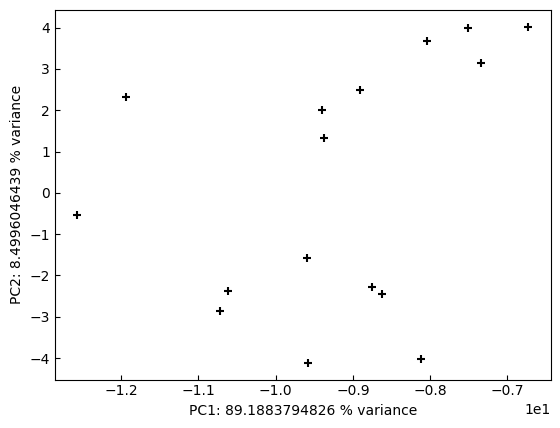

In [93]:
def compute_PCA(X):
    n = X.shape[0]
    Y = (1.0 / np.sqrt(n-1)) * X.T

    _, S, Vt = np.linalg.svd(Y, full_matrices=False)
    var_T = np.sum(S**2)
    v_exp = (S**2)/var_T
    cum_sum = np.cumsum(v_exp)
    for i in range(S.shape[0]):
        print(f"Portion of variance explained by the first {i+1} components: {cum_sum[i]}")
    return Vt@X, v_exp
new_A = x_RCsGoff - np.mean(x_RCsGoff, axis=0)

pca_data, v_exp = compute_PCA(x_example.T)
print(pca_data.shape)
plt.xlabel(f"PC1: {v_exp[0]*100:0.10f} % variance")
plt.ylabel(f"PC2: {v_exp[1]*100:0.10f} % variance")
plt.tick_params(direction='in')
plt.ticklabel_format(style='sci', scilimits=[0,0])
plt.scatter(pca_data[0,:],pca_data[1,:], marker='+', c="black")

In [60]:
print(np.concatenate((np.array([samples]).T, pca_data, np.array([v_exp]).T), axis=1))

[['day0_rep1' '-737166.4705045907' '-610808.2030229416'
  '-488599.6457749516' '43482.639689928175' '-3686.273616389414'
  '-73671.402879717' '-641167.4902403214' '-639134.5230503872'
  '-624943.5834810834' '315658.09934517543' '251760.22346232814'
  '-99062.63100855779' '1266483.3792672113' '-93589.02567995418'
  '371491.2123428641' '609080.396878857' '676057.231800252'
  '299676.0511001562' '133002.10681295054' '45137.908559170515'
  '0.7229910666292592']
 ['day0_rep2' '-18654.586943029582' '16615.789612218832'
  '52940.05465466996' '-227207.6127749348' '-224777.22518188553'
  '-224216.606866604' '15269.55142730101' '6240.986686554665'
  '18917.775357864008' '252023.17336566624' '233066.711392644'
  '145424.44310678562' '367232.0609727645' '37080.61314829312'
  '-418859.99253709806' '-377237.64002077933' '-433566.68703183584'
  '297353.04066111223' '256715.18867053668' '225640.96229975703'
  '0.15784466329358274']
 ['day0_rep3' '-164214.49121265596' '-199713.2639007625'
  '-316005.86